# Iris Data Analysis Project

In [ ]:
First of all before analyzing the data we need to read the Readme file accompanying the Iris data set.
From this we can see that the Iris data is an Iris plants database created in July 1988 by R.A Fisher.

More importantly it tells us the data has 150 instances or rows of data about the Iris plants.
The attributes are 4 numeric, predictive attributes and the class.
The attribute information includes - 

   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica


Before writing any code need to import pandas, numpy, matplotlib, seaborn etc....

In [91]:
from msilib.schema import Class
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns


ModuleNotFoundError: No module named 'pyspark'

## Need to carry out a number of tasks on the Iris Data

 - Read in the Data
 -  Check the data
 -  data types
 -  Clean the Data
 -  Check data
 -  Questions we need to ask of the data
 -  Univariate Anaylsis
 -  Bivariate Analysis


## Read in the Iris Data set

The code below is for mapping column names to each column in the data and also read in the iris.data csv file and assign it to dataframe df

In [44]:
colnames=['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm', 'class']
index=('Iris Setosa', 'Iris Versicolour', 'Iris Virginica')
df = pd.read_csv("iris.data",names=colnames)

We now check to see the column names 

In [45]:
print(df.columns)

Index(['sepal length in cm', 'sepal width in cm', 'petal length in cm',
       'petal width in cm', 'class'],
      dtype='object')


We check the first 10 rows of data using the head() function to see how the data is displayed and have a breief look at the dataset. We can see the numeric attributes 'sepal length in cm', 'sepal width in cm', 'petal length in cm' and 'petal width in cm'. The class column shows the species of Iris plant.

In [46]:
iris_describe = df.head(10)
print(iris_describe)

   sepal length in cm  sepal width in cm  petal length in cm  \
0                 5.1                3.5                 1.4   
1                 4.9                3.0                 1.4   
2                 4.7                3.2                 1.3   
3                 4.6                3.1                 1.5   
4                 5.0                3.6                 1.4   
5                 5.4                3.9                 1.7   
6                 4.6                3.4                 1.4   
7                 5.0                3.4                 1.5   
8                 4.4                2.9                 1.4   
9                 4.9                3.1                 1.5   

   petal width in cm        class  
0                0.2  Iris-setosa  
1                0.2  Iris-setosa  
2                0.2  Iris-setosa  
3                0.2  Iris-setosa  
4                0.2  Iris-setosa  
5                0.4  Iris-setosa  
6                0.3  Iris-setosa  
7      

Next using the shape method we can check the dimensions of the df array. We can see the df array has 150 rows and 5 columns. We can use the value_counts method to get the unique counts of data per Class. We can see below there are 50 unique rows of data for each dataset, that makes up the 150 rows seen intially.

In [47]:
print(df.shape)

print(df["class"].value_counts())

(150, 5)
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64


## Clean the Iris Data

We have had a quick look at the data. Here we need to clean the Iris data which means we need to remove any duplicate data or rows that are missing information.

We use the dropna() method to remove any rows with missing values.

In [48]:
df.dropna(inplace=True)

We can check the data gain to see if there were in deed any rows with missing values.

In [49]:
print(df.shape)
print(df["class"].value_counts())

(150, 5)
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64


We can see that there were no missing values as the number of rows of data remains the same at 150.
We now check for duplicate data using the drop_duplicates() method and set *inplace=True* so it removes in teh current dataframe
df.

In [50]:
df.drop_duplicates(inplace=True)

We check the data again and we can see that there were 3 duplicates in total. One duplicate within the Iris-virginica class and two duplicates in the Iris-setosa class.

In [51]:
print(df.shape)
print(df["class"].value_counts())

(147, 5)
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: class, dtype: int64


## Univariate Analysis

The first piece of real analysis is to carry out analysis on each variable in the dataset. This is what is known as univariate analysis where we will get the summary data using the describe() function. 

In [52]:
summary_iris_all = df.describe()
print(summary_iris_all)

       sepal length in cm  sepal width in cm  petal length in cm  \
count          147.000000         147.000000          147.000000   
mean             5.856463           3.055782            3.780272   
std              0.829100           0.437009            1.759111   
min              4.300000           2.000000            1.000000   
25%              5.100000           2.800000            1.600000   
50%              5.800000           3.000000            4.400000   
75%              6.400000           3.300000            5.100000   
max              7.900000           4.400000            6.900000   

       petal width in cm  
count         147.000000  
mean            1.208844  
std             0.757874  
min             0.100000  
25%             0.300000  
50%             1.300000  
75%             1.800000  
max             2.500000  


The above summary shows there are 147 rows of data as we have cleaned the data and removed any duplicates etc...
This summary data shows the mean, min, max etc... for all 3 classes.

From the summary data we can see that the mean for 'sepal length in cm' which includes all 3 classes is 5.85cm and the range 
is 3.6 cms. The standard deviation is 0.82 which is low and means

## What Questions can we ask of the Iris Dataset 

*How can we distinguish between the 3 species using the numeric data in the csv file ?*

This is the main question. We need to look at the variables and decide which variable(s) can be used to distinguish between the 3 Iris plant species.

## Univariate per Class

We will now carry out Univariate analysis on each Iris plant Class to see what we can fine.
First of all we need to split the data by class or species and we use the groupby() method to carry this out. 
We now have the iris_class object.

In [53]:
iris_class = df.groupby('class')

In [54]:
We use the get_group method on the iris_class object to pull out the data rows for the 'Iris-setosa' class or species.
Looking at the data we can see that the mean for 'sepal length in cm' is 5cm and the range is from 4.3cm to 5.8cm. 
Mean 'sepal width in cm' is 3.43cm and the range is from 2.3cm to 4.4cm.
Mean for 'petal length in cm' is 1.46cm and the range is from 1cm to 1.9cm.
Mean for 'petal width in cm' is 0.25cm and the range is from 0.1cm to 0.6cm.
The standard deviation for all the variables is less than 1 which indicates that the values are close to the mean or clustered 
around teh mean. We need to compare the mean, range and standard deviations values against the 
Versicolor and Virginica species. 

SyntaxError: invalid syntax (Temp/ipykernel_12736/3523831741.py, line 1)

In [55]:
setosa = iris_class.get_group('Iris-setosa')
print(setosa.describe())

       sepal length in cm  sepal width in cm  petal length in cm  \
count           48.000000          48.000000           48.000000   
mean             5.010417           3.431250            1.462500   
std              0.359219           0.383243            0.177002   
min              4.300000           2.300000            1.000000   
25%              4.800000           3.200000            1.400000   
50%              5.000000           3.400000            1.500000   
75%              5.200000           3.700000            1.600000   
max              5.800000           4.400000            1.900000   

       petal width in cm  
count          48.000000  
mean            0.250000  
std             0.105185  
min             0.100000  
25%             0.200000  
50%             0.200000  
75%             0.300000  
max             0.600000  


We do the same for the versicolor class.
Looking at the data we can see that the mean for 'sepal length in cm' is 5.93cm and the range is from 4.9cm to 7.0cm. 
Mean for 'sepal width in cm' is 2.77cm and the range is from 2.0cm to 3.4cm.
Mean for 'petal length in cm' is 4.26cm and the range is from 3cm to 5.1cm.
Mean for 'petal width in cm' is 1.32cm and the range is from 1.0cm to 1.8cm.
The standard deviation for all the variables is less than 1 which indicates that the values are close to the mean or clustered 
around the mean. 

In [56]:
versicolor = iris_class.get_group('Iris-versicolor')
print(versicolor.describe())

       sepal length in cm  sepal width in cm  petal length in cm  \
count           50.000000          50.000000           50.000000   
mean             5.936000           2.770000            4.260000   
std              0.516171           0.313798            0.469911   
min              4.900000           2.000000            3.000000   
25%              5.600000           2.525000            4.000000   
50%              5.900000           2.800000            4.350000   
75%              6.300000           3.000000            4.600000   
max              7.000000           3.400000            5.100000   

       petal width in cm  
count          50.000000  
mean            1.326000  
std             0.197753  
min             1.000000  
25%             1.200000  
50%             1.300000  
75%             1.500000  
max             1.800000  


We do the same for the verginica class.
Looking at the data we can see that the mean for 'sepal length in cm' is 6.6cm and the range is from 4.9cm to 7.9cm. 
Mean for 'sepal width in cm' is 2.97cm and the range is from 2.2cm to 3.8cm.
Mean for 'petal length in cm' is 5.56cm and the range is from 4.5cm to 6.9cm.
Mean for 'petal width in cm' is 2.02cm and the range is from 1.4cm to 2.5cm.
The standard deviation for all the variables is less than 1 which indicates that the values are close to the mean or clustered 
around the mean. 

In [57]:
virginica = iris_class.get_group('Iris-virginica')
print(virginica.describe())

       sepal length in cm  sepal width in cm  petal length in cm  \
count           49.000000          49.000000           49.000000   
mean             6.604082           2.979592            5.561224   
std              0.632113           0.323380            0.553706   
min              4.900000           2.200000            4.500000   
25%              6.300000           2.800000            5.100000   
50%              6.500000           3.000000            5.600000   
75%              6.900000           3.200000            5.900000   
max              7.900000           3.800000            6.900000   

       petal width in cm  
count          49.000000  
mean            2.028571  
std             0.276887  
min             1.400000  
25%             1.800000  
50%             2.000000  
75%             2.300000  
max             2.500000  


### Analyzing the Summary statistics for the 3 Species

#### Sepal Length
For the species Setosa the mean value for Sepal length is 5cm, the mean value for Versicolor is 5.93 and and Virginica 
is 6.6cm. There is a difference between each of the means for all three species so it could be a variable to distinguish 
between the species. The range and interquartile range would need to be examined. Looking at the range we can see that the range for setosa is from 4.3cm to 5.8cm, versicolor is 4.9cm to 7.0cm and Virginica 4.9cm to 7.9cm. You can see that the range of values do overlap so Sepal Length may not be a good variable to distinguish between species. We will take a look at boxplots later to get a beter idea.  

#### Sepal Width
For the species Setosa the mean value for Sepal length is 3.43cm, the mean value for Versicolor is 2.77 and and Virginica 
is 2.9cm. The Mean values for Versicolor and Virginica are similar, there's only 0.13cm between them so it doesn't appear as if this is a good variable to distinguid between the species. The ranges for Sepal Width for all 3 species overlap so from this analysis Sepal Width doesn't appear like it could be a good value to seoarate the species.

#### Petal Length
For the species Setosa the mean value for Petal length is 1.46cm, the mean value for Versicolor is 4.26 and and Virginica 
is 5.56cm. The range for Setosa is between 1cm and 1.9cm, versicolor 3cm to 5.1cm and virginica 4.5cm to 6.9cm. You can see 
see that the Petal Length for the species setosa doesn't overlap with versicolor or virginica.  

#### Petal Width
For the species Setosa the mean value for Sepal length is 0.25cm, the mean value for Versicolor is 1.32cm and and Virginica 
is 2cm. The range for Setosa is 0.1cm to 0.6cm, the range for versicolor is 1cm to 1.8cm and range for virginica is 1.4cm to 2.5cm. Since the range of Petal width for Setosa doesn't overlap the range of values for Versicolor or Virginica you could say that this is one variable that can distinguish between the species Setosa and the orther 2 species.

#### Summary Univariate analysis using describe() method
Petal Length and Petal Width look to be good variables to use when distinguishing between the sepcies Setosa and the other two species Versicolor and Virginica. Distinguishing between Versicolor and Virginica species from teh variables may not be possible.

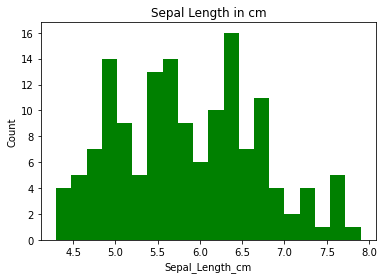

In [58]:
sepal_length = df["sepal length in cm"]
  
plt.hist(sepal_length, bins = 20, color = "green")
plt.title("Sepal Length in cm")
plt.xlabel("Sepal_Length_cm")
plt.ylabel("Count")
plt.show()

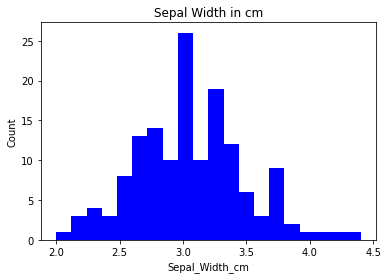

In [59]:
sepal_width = df["sepal width in cm"]
  
plt.hist(sepal_width, bins = 20, color = "blue")
plt.title("Sepal Width in cm")
plt.xlabel("Sepal_Width_cm")
plt.ylabel("Count")
plt.show()

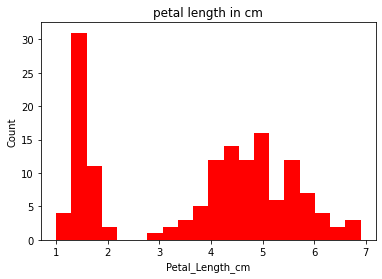

In [60]:
petal_length = df["petal length in cm"]
  
plt.hist(petal_length, bins = 20, color = "red")
plt.title("petal length in cm")
plt.xlabel("Petal_Length_cm")
plt.ylabel("Count")
plt.show()

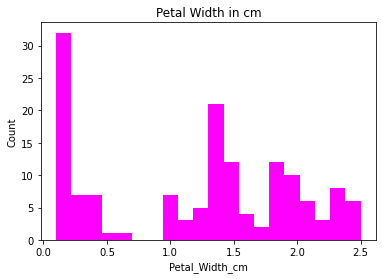

In [61]:
petal_width = df["petal width in cm"]
  
plt.hist(petal_width, bins = 20, color = "magenta")
plt.title("Petal Width in cm")
plt.xlabel("Petal_Width_cm")
plt.ylabel("Count")
plt.show()

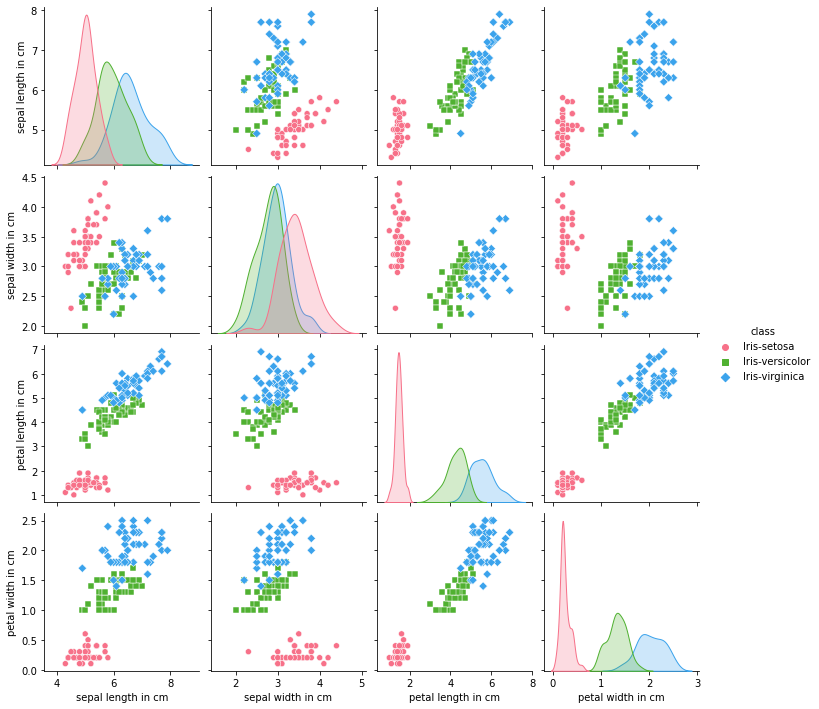

In [62]:
sns.pairplot(df,hue="class", palette="husl", markers=["o", "s", "D"])
plt.show()

In [63]:
iris_class = df.groupby('class')
setosa = iris_class.get_group('Iris-setosa')
print(setosa.describe())

       sepal length in cm  sepal width in cm  petal length in cm  \
count           48.000000          48.000000           48.000000   
mean             5.010417           3.431250            1.462500   
std              0.359219           0.383243            0.177002   
min              4.300000           2.300000            1.000000   
25%              4.800000           3.200000            1.400000   
50%              5.000000           3.400000            1.500000   
75%              5.200000           3.700000            1.600000   
max              5.800000           4.400000            1.900000   

       petal width in cm  
count          48.000000  
mean            0.250000  
std             0.105185  
min             0.100000  
25%             0.200000  
50%             0.200000  
75%             0.300000  
max             0.600000  


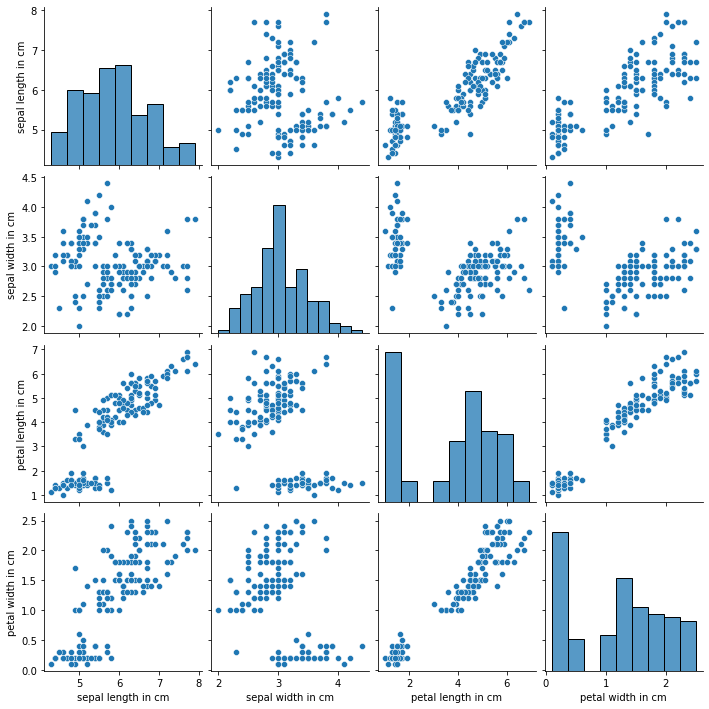

In [64]:
sns.pairplot(df,palette="husl", markers=["o", "s", "D"])
plt.show()

In [65]:
versicolor = iris_class.get_group('Iris-versicolor')
print(versicolor.describe())

       sepal length in cm  sepal width in cm  petal length in cm  \
count           50.000000          50.000000           50.000000   
mean             5.936000           2.770000            4.260000   
std              0.516171           0.313798            0.469911   
min              4.900000           2.000000            3.000000   
25%              5.600000           2.525000            4.000000   
50%              5.900000           2.800000            4.350000   
75%              6.300000           3.000000            4.600000   
max              7.000000           3.400000            5.100000   

       petal width in cm  
count          50.000000  
mean            1.326000  
std             0.197753  
min             1.000000  
25%             1.200000  
50%             1.300000  
75%             1.500000  
max             1.800000  


In [66]:
virginica = iris_class.get_group('Iris-virginica')
print(virginica.describe())

       sepal length in cm  sepal width in cm  petal length in cm  \
count           49.000000          49.000000           49.000000   
mean             6.604082           2.979592            5.561224   
std              0.632113           0.323380            0.553706   
min              4.900000           2.200000            4.500000   
25%              6.300000           2.800000            5.100000   
50%              6.500000           3.000000            5.600000   
75%              6.900000           3.200000            5.900000   
max              7.900000           3.800000            6.900000   

       petal width in cm  
count          49.000000  
mean            2.028571  
std             0.276887  
min             1.400000  
25%             1.800000  
50%             2.000000  
75%             2.300000  
max             2.500000  


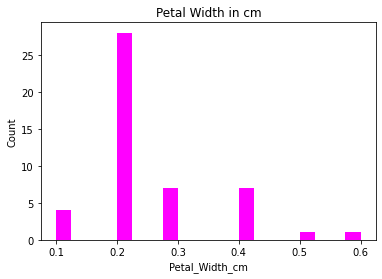

In [67]:
setosa_petal_width = setosa["petal width in cm"]
  
plt.hist(setosa_petal_width, bins = 20, color = "magenta")
plt.title("Petal Width in cm")
plt.xlabel("Petal_Width_cm")
plt.ylabel("Count")
plt.show()

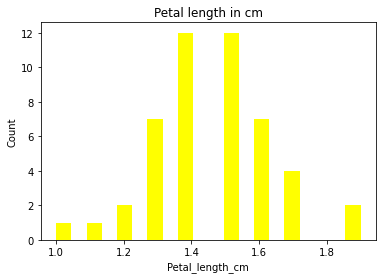

In [68]:
setosa_petal_length = setosa["petal length in cm"]
  
plt.hist(setosa_petal_length, bins = 20, color = "yellow")
plt.title("Petal length in cm")
plt.xlabel("Petal_length_cm")
plt.ylabel("Count")
plt.show()

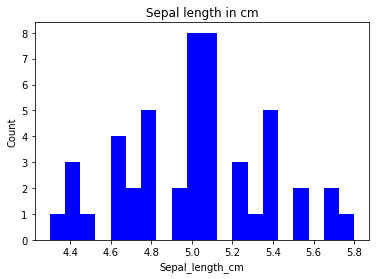

In [69]:
setosa_sepal_length = setosa["sepal length in cm"]
  
plt.hist(setosa_sepal_length, bins = 20, color = "blue")
plt.title("Sepal length in cm")
plt.xlabel("Sepal_length_cm")
plt.ylabel("Count")
plt.show()

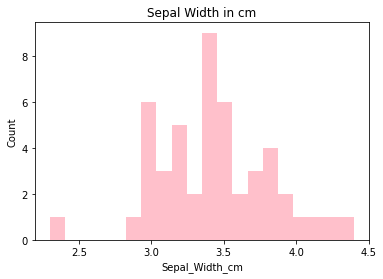

In [70]:
setosa_sepal_width = setosa["sepal width in cm"]
  
plt.hist(setosa_sepal_width, bins = 20, color = "pink")
plt.title("Sepal Width in cm")
plt.xlabel("Sepal_Width_cm")
plt.ylabel("Count")
plt.show()

Versicolor

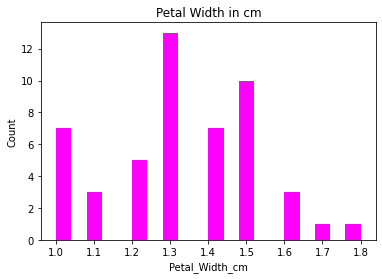

In [71]:
versicolor_petal_width = versicolor["petal width in cm"]
  
plt.hist(versicolor_petal_width, bins = 20, color = "magenta")
plt.title("Petal Width in cm")
plt.xlabel("Petal_Width_cm")
plt.ylabel("Count")
plt.show()

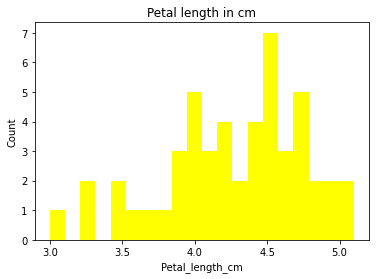

In [72]:
versicolor_petal_length = versicolor["petal length in cm"]
  
plt.hist(versicolor_petal_length, bins = 20, color = "yellow")
plt.title("Petal length in cm")
plt.xlabel("Petal_length_cm")
plt.ylabel("Count")
plt.show()

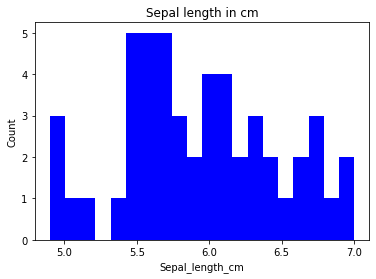

In [73]:
versicolor_sepal_length = versicolor["sepal length in cm"]
  
plt.hist(versicolor_sepal_length, bins = 20, color = "blue")
plt.title("Sepal length in cm")
plt.xlabel("Sepal_length_cm")
plt.ylabel("Count")
plt.show()

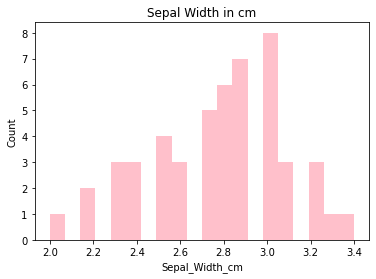

In [74]:
versicolor_sepal_width = versicolor["sepal width in cm"]
  
plt.hist(versicolor_sepal_width, bins = 20, color = "pink")
plt.title("Sepal Width in cm")
plt.xlabel("Sepal_Width_cm")
plt.ylabel("Count")
plt.show()

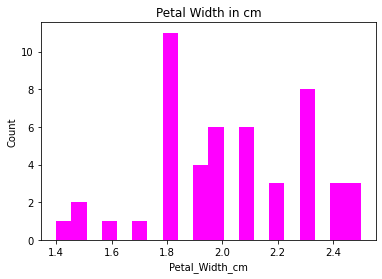

In [75]:
virginica_petal_width = virginica["petal width in cm"]
  
plt.hist(virginica_petal_width, bins = 20, color = "magenta")
plt.title("Petal Width in cm")
plt.xlabel("Petal_Width_cm")
plt.ylabel("Count")
plt.show()

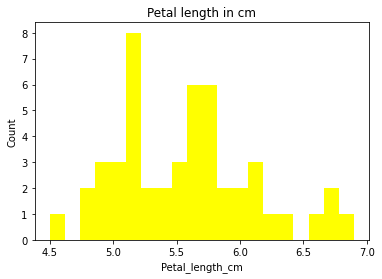

In [76]:
virginica_petal_length = virginica["petal length in cm"]
  
plt.hist(virginica_petal_length, bins = 20, color = "yellow")
plt.title("Petal length in cm")
plt.xlabel("Petal_length_cm")
plt.ylabel("Count")
plt.show()

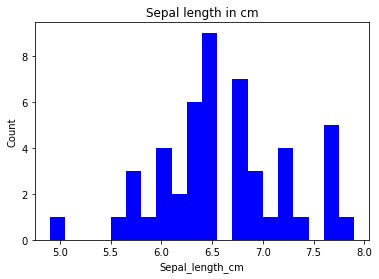

In [77]:
virginica_sepal_length = virginica["sepal length in cm"]
  
plt.hist(virginica_sepal_length, bins = 20, color = "blue")
plt.title("Sepal length in cm")
plt.xlabel("Sepal_length_cm")
plt.ylabel("Count")
plt.show()

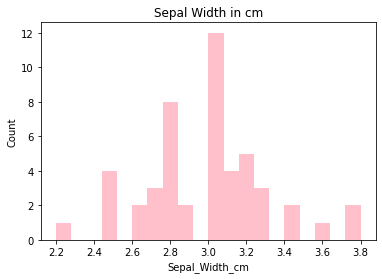

In [78]:
virginica_sepal_width = virginica["sepal width in cm"]
  
plt.hist(virginica_sepal_width, bins = 20, color = "pink")
plt.title("Sepal Width in cm")
plt.xlabel("Sepal_Width_cm")
plt.ylabel("Count")
plt.show()

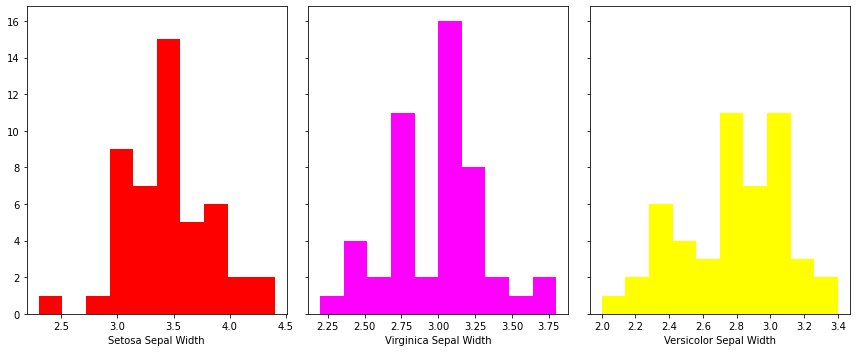

In [79]:
#plt.hist(virginica_sepal_width, bins = 20, color = "pink")
#plt.hist(setosa_sepal_width, bins = 20, color = "red")
#plt.hist(setosa_sepal_width, bins = 20, color = "blue")



fig, axs = plt.subplots(1, 3, figsize=(12, 5), sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(setosa_sepal_width, color = "red")
axs[0].set_xlabel("Setosa Sepal Width")
axs[1].hist(virginica_sepal_width, color = "magenta")
axs[1].set_xlabel("Virginica Sepal Width")
axs[2].hist(versicolor_sepal_width, color = "yellow")
axs[2].set_xlabel("Versicolor Sepal Width")

plt.show()

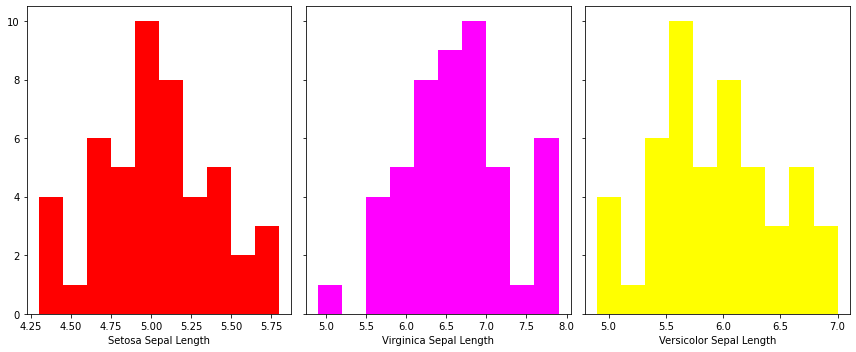

In [80]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5), sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(setosa_sepal_length, color = "red")
axs[0].set_xlabel("Setosa Sepal Length")
axs[1].hist(virginica_sepal_length, color = "magenta")
axs[1].set_xlabel("Virginica Sepal Length")
axs[2].hist(versicolor_sepal_length, color = "yellow")
axs[2].set_xlabel("Versicolor Sepal Length")

plt.show()

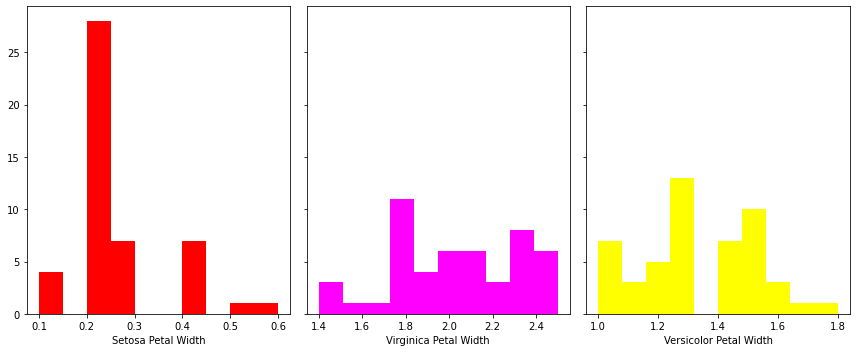

In [81]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5), sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(setosa_petal_width, color = "red")
axs[0].set_xlabel("Setosa Petal Width")
axs[1].hist(virginica_petal_width, color = "magenta")
axs[1].set_xlabel("Virginica Petal Width")
axs[2].hist(versicolor_petal_width, color = "yellow")
axs[2].set_xlabel("Versicolor Petal Width")

plt.show()

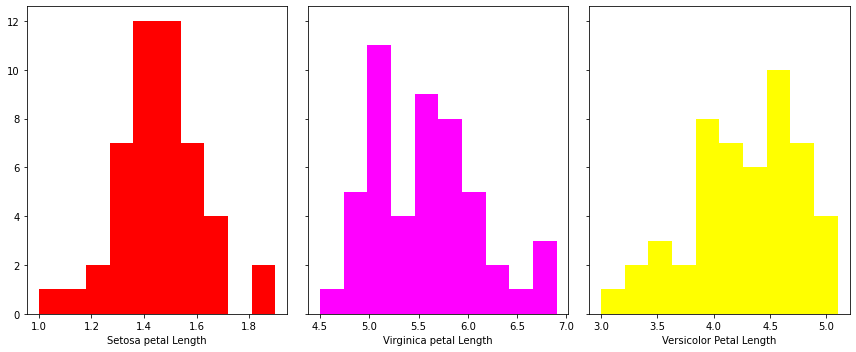

In [82]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5), sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(setosa_petal_length, color = "red")
axs[0].set_xlabel("Setosa petal Length")
axs[1].hist(virginica_petal_length, color = "magenta")
axs[1].set_xlabel("Virginica petal Length")
axs[2].hist(versicolor_petal_length, color = "yellow")
axs[2].set_xlabel("Versicolor Petal Length")

plt.show()

## Boxplots

Boxplot for Petal Lenghth - Setosa, Versicolor and Virginica. You can clearly see from the 3 boxplots that the median for Setosa Petal length is 1.5cms compared to versicolor petal length which is just below 4.5cms and virginica petal length which is approimately 5.75cm.  



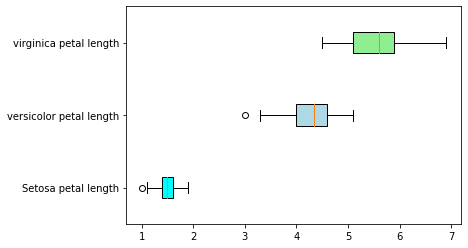

In [83]:
box_plot_data=[setosa_petal_length,versicolor_petal_length,virginica_petal_length]
#plt.boxplot(box_plot_data)

box=plt.boxplot(box_plot_data,vert=0,patch_artist=True,labels=['Setosa petal length','versicolor petal length','virginica petal length'],
            )
 
colors = ['cyan', 'lightblue', 'lightgreen', 'tan']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.show()

Boxplots for petal Width - Setosa, Versicolor and Virginica. Again Setosa 

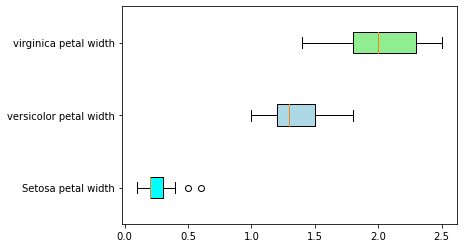

In [84]:
box_plot_data=[setosa_petal_width,versicolor_petal_width,virginica_petal_width]
box=plt.boxplot(box_plot_data,vert=0,patch_artist=True,labels=['Setosa petal width','versicolor petal width','virginica petal width'],
            )
 
colors = ['cyan', 'lightblue', 'lightgreen', 'tan']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.show()

Boxplot for Sepal Lenghth for Setosa, Versicolor and Virginica

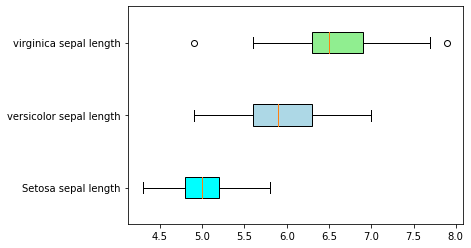

In [85]:
box_plot_data=[setosa_sepal_length,versicolor_sepal_length,virginica_sepal_length]
box=plt.boxplot(box_plot_data,vert=0,patch_artist=True,labels=['Setosa sepal length','versicolor sepal length','virginica sepal length'],
            )
 
colors = ['cyan', 'lightblue', 'lightgreen', 'tan']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.show()

Boxplot for Sepal Width for the 3 Classes

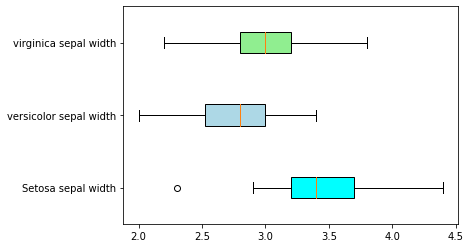

In [86]:
box_plot_data=[setosa_sepal_width,versicolor_sepal_width,virginica_sepal_width]
box=plt.boxplot(box_plot_data,vert=0,patch_artist=True,labels=['Setosa sepal width','versicolor sepal width','virginica sepal width'],
            )
 
colors = ['cyan', 'lightblue', 'lightgreen', 'tan']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.show()

In [87]:
print(df.corr())

                    sepal length in cm  sepal width in cm  petal length in cm  \
sepal length in cm            1.000000          -0.109321            0.871305   
sepal width in cm            -0.109321           1.000000           -0.421057   
petal length in cm            0.871305          -0.421057            1.000000   
petal width in cm             0.817058          -0.356376            0.961883   

                    petal width in cm  
sepal length in cm           0.817058  
sepal width in cm           -0.356376  
petal length in cm           0.961883  
petal width in cm            1.000000  


## Bivariate Analysis

By using seaborn's pairplot it allows us to look at all the variables in the dataframe df and carry out scatter plots.
I have provided the class variable to the to the argument hue. As a result the pairplot will now split the data by the class variable. The classes are distinguised by using the palette and markers arguments.


https://datavizpyr.com/pairplot-with-seaborn-in-python/

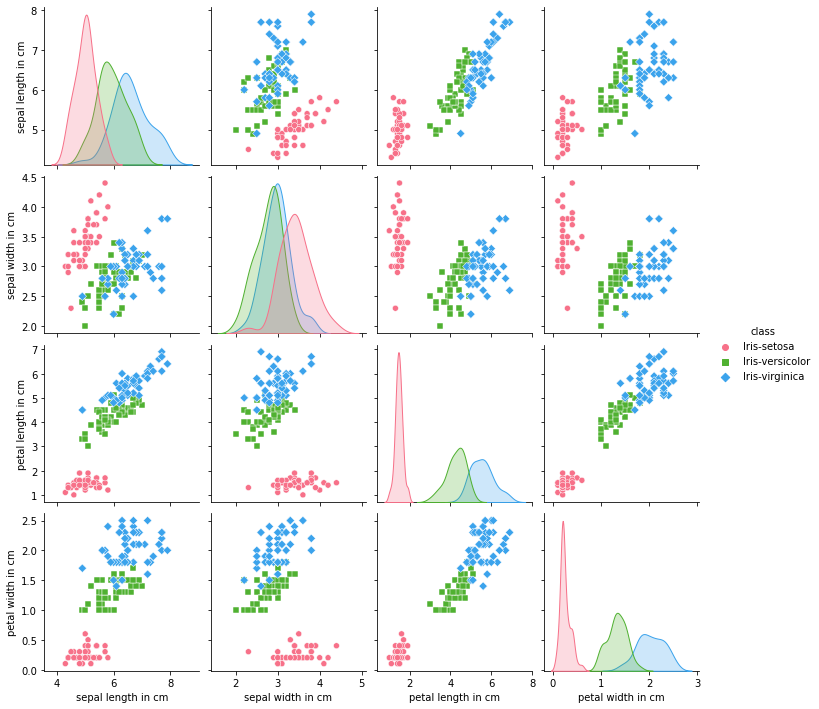

In [88]:
sns.pairplot(df,hue="class", palette="husl", markers=["o", "s", "D"])
plt.show()

### Analysis of the Bivariate plots



In [102]:
print(setosa.corr(method='pearson'))

                    sepal length in cm  sepal width in cm  petal length in cm  \
sepal length in cm            1.000000           0.748698            0.267285   
sepal width in cm             0.748698           1.000000            0.187016   
petal length in cm            0.267285           0.187016            1.000000   
petal width in cm             0.273107           0.245430            0.331412   

                    petal width in cm  
sepal length in cm           0.273107  
sepal width in cm            0.245430  
petal length in cm           0.331412  
petal width in cm            1.000000  


If we apply the correlation efficient to the setosa class by using the corr() method we can see that the strongest relationship
between two variables is sepal width and sepal length which is 0.74. If its close to 1 teh two variables have a strog relationship and near to -1 its a weak relationship. 

In [103]:
print(versicolor.corr(method='pearson'))

                    sepal length in cm  sepal width in cm  petal length in cm  \
sepal length in cm            1.000000           0.525911            0.754049   
sepal width in cm             0.525911           1.000000            0.560522   
petal length in cm            0.754049           0.560522            1.000000   
petal width in cm             0.546461           0.663999            0.786668   

                    petal width in cm  
sepal length in cm           0.546461  
sepal width in cm            0.663999  
petal length in cm           0.786668  
petal width in cm            1.000000  


In [104]:
print(virginica.corr(method='pearson'))

                    sepal length in cm  sepal width in cm  petal length in cm  \
sepal length in cm            1.000000           0.445797            0.862951   
sepal width in cm             0.445797           1.000000            0.392242   
petal length in cm            0.862951           0.392242            1.000000   
petal width in cm             0.274282           0.534810            0.317198   

                    petal width in cm  
sepal length in cm           0.274282  
sepal width in cm            0.534810  
petal length in cm           0.317198  
petal width in cm            1.000000  
